In [1]:
import numpy as np
import re

In [2]:
# No. of layers = 2
# Types = (Conv+MaxPool)*2 > ReLU

In [3]:
f = open("4.dat","r")
myList = []
for line in f:
    myList.append(line)

In [4]:
def get_data( output ):
    trloss_patt = 'Train net output #0: loss = (\d.\d*)'
    tsloss_patt = 'Test net output #1: loss = (\d.\d*)'
    tsacc_patt = 'Test net output #0: accuracy = (\d.\d*)\n'
    iteration_patt = 'Iteration (\d*) \('
    trloss = re.search(trloss_patt, output)
    tsacc = re.search(tsacc_patt, output)
    tsloss = re.search(tsloss_patt, output)
    iteration = re.search(iteration_patt,output)
    results = (iteration, trloss, tsacc, tsloss)
    names = ['iteration', 'trloss', 'tsacc', 'tsloss']
    if results!=None:
        index = np.where(np.array(results)!=None)[0][0]
        result = results[index]
        result = result.group(1)
#         print '\nparsed', output, '\nwith', names[index], result
        return index, result
#     loss = m.group( 1 )
#     return iteration, accuracy, loss

In [5]:
trloss = [[],[]]
tsacc = [[],[]]
tsloss = [[],[]]
summary = [trloss,tsacc,tsloss]
old_iteration=0
for line in myList:
    try:
        i,r = get_data(line)
        if i==0:
            new_iteration = r
            old_iteration = new_iteration
        else:
            summary[i-1][0].append(old_iteration)
            summary[i-1][1].append(r)
    except:
        pass
#         print '\ncannot parse {}'.format(line)

<IPython.core.display.Javascript object>


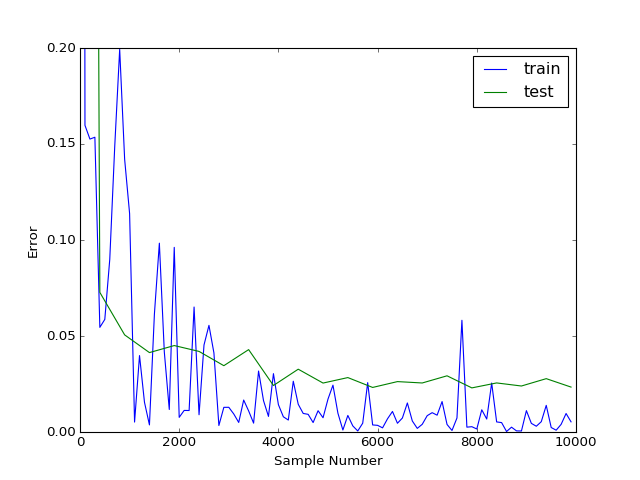

<IPython.core.display.Javascript object>


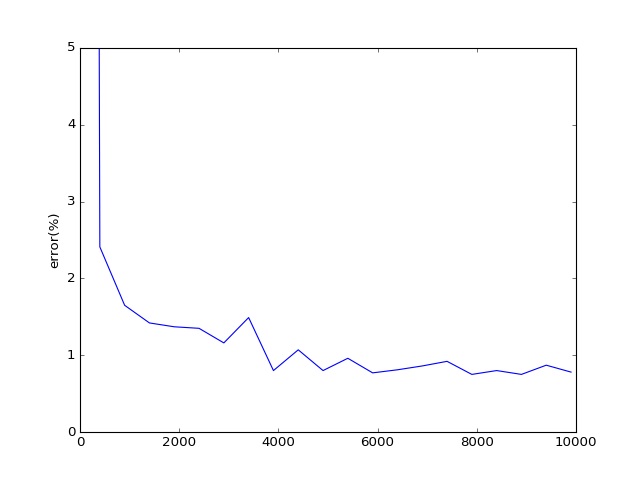

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(trloss[0],trloss[1],label='train')
plt.plot(tsloss[0],tsloss[1],label='test')
plt.ylabel('Error')
plt.xlabel('Sample Number')
plt.legend()
plt.ylim(0,.2)
# plt.semilogx()
plt.figure()
plt.plot(tsacc[0],(1-np.array(tsacc[1]).astype('float'))*100)
plt.ylabel('error(%)')
plt.ylim(0,5)
plt.show()

In [7]:
print myList[-10:-1]

['I1112 01:39:32.412056  3508 sgd_solver.cpp:105] Iteration 9900, lr = 0.00596843\n', 'I1112 01:39:42.827769  3508 solver.cpp:448] Snapshotting to binary proto file examples/mnist/lenet_iter_10000.caffemodel\n', 'I1112 01:39:42.839372  3508 sgd_solver.cpp:273] Snapshotting solver state to binary proto file examples/mnist/lenet_iter_10000.solverstate\n', 'I1112 01:39:42.916149  3508 solver.cpp:311] Iteration 10000, loss = 0.00426176\n', 'I1112 01:39:42.916188  3508 solver.cpp:331] Iteration 10000, Testing net (#0)\n', 'I1112 01:39:49.051916  3519 data_layer.cpp:73] Restarting data prefetching from start.\n', 'I1112 01:39:49.291612  3508 solver.cpp:398]     Test net output #0: accuracy = 0.9922\n', 'I1112 01:39:49.291704  3508 solver.cpp:398]     Test net output #1: loss = 0.0233948 (* 1 = 0.0233948 loss)\n', 'I1112 01:39:49.291731  3508 solver.cpp:316] Optimization Done.\n']


In [8]:
myList[-100:]

['I1112 01:35:12.381688  3508 sgd_solver.cpp:105] Iteration 7500, lr = 0.00657236\n',
 'I1112 01:35:21.451532  3508 solver.cpp:219] Iteration 7600 (11.0266 iter/s, 9.069s/100 iters), loss = 0.00729312\n',
 'I1112 01:35:21.451584  3508 solver.cpp:238]     Train net output #0: loss = 0.00729305 (* 1 = 0.00729305 loss)\n',
 'I1112 01:35:21.451596  3508 sgd_solver.cpp:105] Iteration 7600, lr = 0.00654433\n',
 'I1112 01:35:31.374939  3508 solver.cpp:219] Iteration 7700 (10.0776 iter/s, 9.923s/100 iters), loss = 0.0581825\n',
 'I1112 01:35:31.374984  3508 solver.cpp:238]     Train net output #0: loss = 0.0581824 (* 1 = 0.0581824 loss)\n',
 'I1112 01:35:31.375010  3508 sgd_solver.cpp:105] Iteration 7700, lr = 0.00651658\n',
 'I1112 01:35:41.315789  3508 solver.cpp:219] Iteration 7800 (10.0604 iter/s, 9.94s/100 iters), loss = 0.0025233\n',
 'I1112 01:35:41.315850  3508 solver.cpp:238]     Train net output #0: loss = 0.00252323 (* 1 = 0.00252323 loss)\n',
 'I1112 01:35:41.315860  3508 sgd_solve